In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('cycle_31.csv')

In [4]:
df['DAY_1_DIFF']

0       -65533.5
1            2.5
2            2.5
3            2.5
4            2.5
          ...   
21392        4.0
21393        4.0
21394        2.0
21395        0.0
21396        3.5
Name: DAY_1_DIFF, Length: 21397, dtype: float64

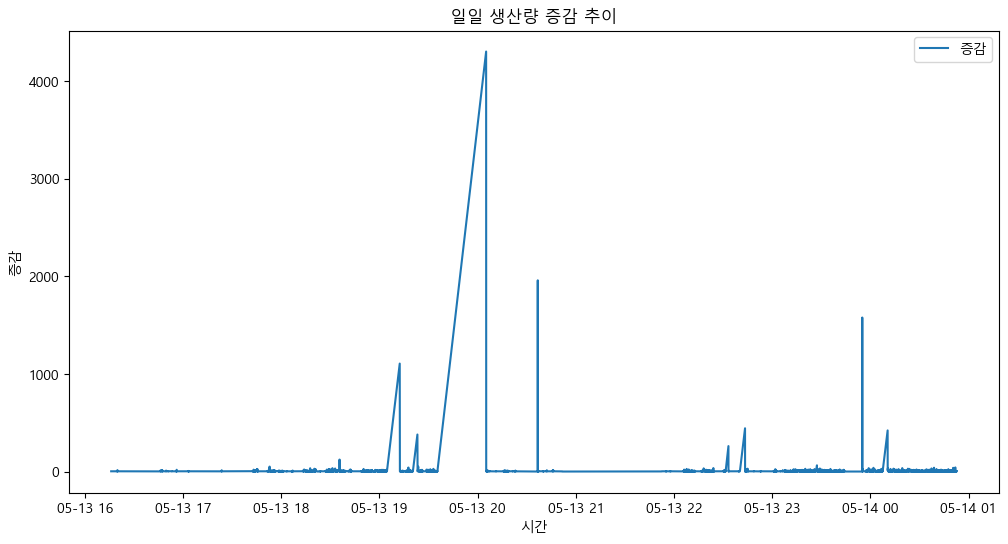

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.iloc[1:]  # 첫 번째 행 제외

plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['DAY_1_DIFF'], label='증감')
plt.xlabel('시간')
plt.ylabel('증감')
plt.title('일일 생산량 증감 추이')
plt.legend()

In [7]:
df[df['DAY_1_DIFF'] > 3000]

,Timestamp,OUTPUT_COUNT_DAY_1,KO6_MOTOR_SET_FREQ,CUTTING_SET_FREQ,STATUS,KO5_MOTOR_SET_FREQ,METAL_OIL_SUPPLY_PRESS_CONTR,KO4_MOTOR_SET_FREQ,KO2_MOTOR_SET_FREQ,MAIN_MOTOR_CURR,...,MAIN_MOTOR_SET_FREQ,KO1_MOTOR_INVERTER_ALM,TRANS_POS_DOWN_SET_H,OUTPUT_COUNT_DAY_2,OUTPUT_COUNT_SUM,TRANS_POS_DOWN,TRANS_POS_RIGHT,MAIN_MOTOR_ALM,DAY_1_DIFF,CYCLE
9605,2022-05-13 20:05:14,32835.0,6000.0,6000.0,2.0,6000.0,221.0,6000.0,6000.0,6023.0,...,4333.0,1.0,4000.0,32835.0,1218.0,633.2,1732.6,0.0,4301.0,31


In [12]:
df = pd.read_csv('data.csv')

In [ ]:
# 정상 비정상
# 상태별 데이터 분리
normal = df[df['STATUS'] == 2]
abnormal = df[df['STATUS'] == 0.5]

# 비교할 주요 센서 리스트
sensor_cols = [
    'MAIN_AIR_PRESS', 'MAIN_MOTOR_CURR', 'MAIN_MOTOR_RPM',
    'MAIN_MOTOR_SET_FREQ', 'KO1_MOTOR_SET_FREQ', 'KO2_MOTOR_SET_FREQ',
    'TONGS_CAST_SET_FREQ', 'TRANS_SET_FREQ', 'CUTTING_SET_FREQ',
    'TONGS_CAST_CURR', 'OIL_SUPPLY_PRESS',
    'WORK_OIL_SUPPLY_PRESS', 'METAL_TEMP_CONTROL'
]

# 각 센서의 평균 비교
for col in sensor_cols:
    mean_normal = normal[col].mean()
    mean_abnormal = abnormal[col].mean()
    diff = mean_abnormal - mean_normal
    print(f'{col}: 정상={mean_normal:.2f}, 비정상={mean_abnormal:.2f}, 차이={diff:.2f}')


MAIN_AIR_PRESS: 정상=2585.53, 비정상=2579.35, 차이=-6.19
MAIN_MOTOR_CURR: 정상=4901.72, 비정상=3941.52, 차이=-960.20
MAIN_MOTOR_RPM: 정상=12224.08, 비정상=12979.20, 차이=755.11
MAIN_MOTOR_SET_FREQ: 정상=3819.47, 비정상=4333.00, 차이=513.53
KO1_MOTOR_SET_FREQ: 정상=5545.52, 비정상=6000.00, 차이=454.48
KO2_MOTOR_SET_FREQ: 정상=5545.52, 비정상=6000.00, 차이=454.48
TONGS_CAST_SET_FREQ: 정상=5907.77, 비정상=5993.03, 차이=85.25
TRANS_SET_FREQ: 정상=5288.90, 비정상=6000.00, 차이=711.10
CUTTING_SET_FREQ: 정상=5288.90, 비정상=6000.00, 차이=711.10
TONGS_CAST_CURR: 정상=18.22, 비정상=2.02, 차이=-16.20
OIL_SUPPLY_PRESS: 정상=430.70, 비정상=505.82, 차이=75.12
WORK_OIL_SUPPLY_PRESS: 정상=1694.28, 비정상=1828.27, 차이=133.99
METAL_TEMP_CONTROL: 정상=37.81, 비정상=36.81, 차이=-1.00


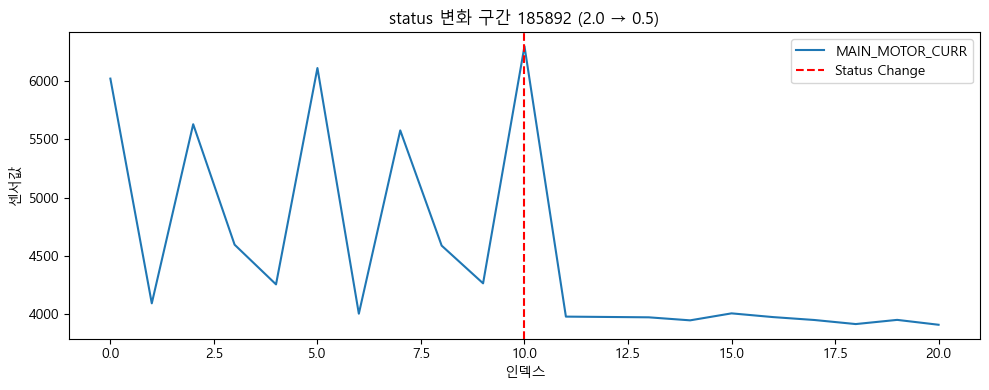

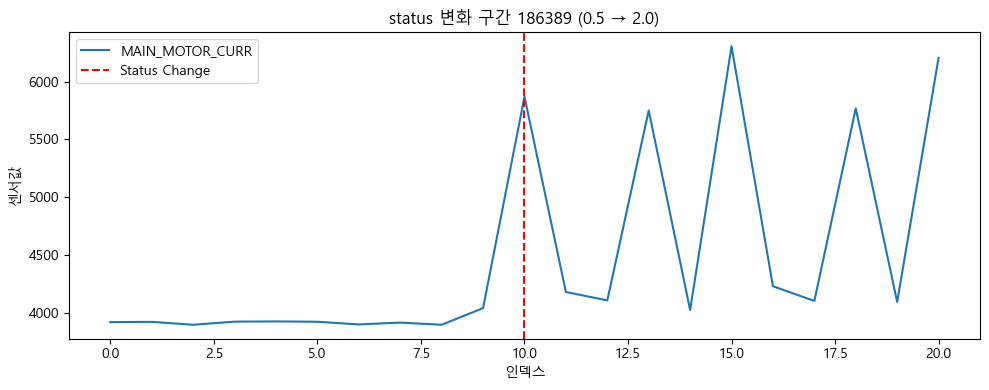

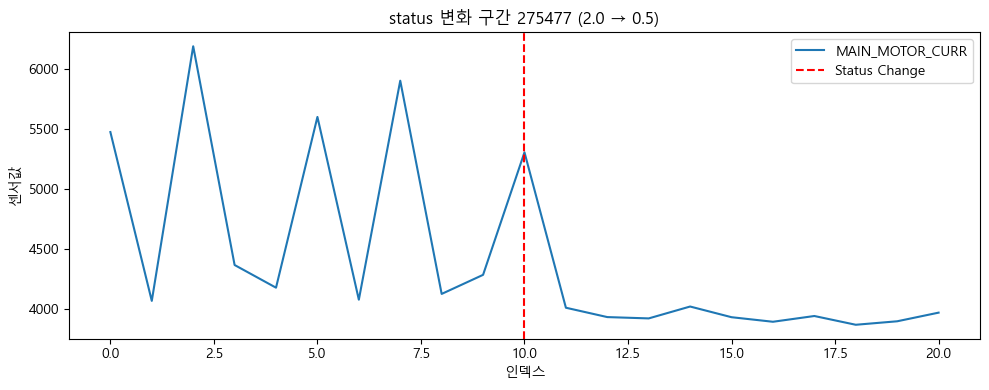

In [32]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# 전후 몇 행 볼지 설정
window = 10 
sensor_col = [
    'MAIN_MOTOR_CURR'

]
# 전처리: status 컬럼 변화 감지
df['status_prev'] = df['STATUS'].shift(1)

# 0.5 → 2 또는 2 → 0.5 변화 시점 인덱스 추출
transition_indices = df[
    ((df['status_prev'] == 0.5) & (df['STATUS'] == 2)) |
    ((df['status_prev'] == 2) & (df['STATUS'] == 0.5))
].index

# 첫 3개의 변화 시점만 그래프 확인
for i, idx in enumerate(transition_indices[:3]):
    start = max(0, idx - window)
    end = min(len(df), idx + window + 1)
    segment = df.iloc[start:end].reset_index(drop=True)

    plt.figure(figsize=(10, 4))
    for col in sensor_col:
        plt.plot(segment.index, segment[col], label=col)
    
    plt.axvline(x=window, color='red', linestyle='--', label='Status Change')
    plt.title(f'status 변화 구간 {idx} ({df.loc[idx, "status_prev"]} → {df.loc[idx, "STATUS"]})')
    plt.xlabel('인덱스')
    plt.ylabel('센서값')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [20]:
df.columns

Index(['Timestamp', 'OUTPUT_COUNT_DAY_1', 'KO6_MOTOR_SET_FREQ',
       'CUTTING_SET_FREQ', 'STATUS', 'KO5_MOTOR_SET_FREQ',
       'METAL_OIL_SUPPLY_PRESS_CONTR', 'KO4_MOTOR_SET_FREQ',
       'KO2_MOTOR_SET_FREQ', 'MAIN_MOTOR_CURR', 'KO3_MOTOR_SET_FREQ',
       'TRANS_POS_UP_SET_H', 'TONGS_INVERTER_ALM_ERR_CD', 'KO1_MOTOR_SET_FREQ',
       'KO3_MOTOR_INVERTER_ALM', 'MAIN_MOTOR_RPM', 'TRANS_INVERTER_ALM_ERR_CD',
       'TONGS_CAST_SET_FREQ', 'TRANS_POS_LEFT_SET_H', 'KO4_MOTOR_INVERTER_ALM',
       'OIL_SUPPLY_PRESS', 'KO2_MOTOR_INVERTER_ALM', 'TRANS_POS_UP',
       'TONGS_POS', 'WORK_OIL_SUPPLY_PRESS', 'METAL_TEMP_CONTROL',
       'TONGS_CAST_CURR', 'CUTTING_INVERTER_ALM_ERR_CD',
       'KO6_MOTOR_INVERTER_ALM', 'TRANS_POS_RIGHT_SET_H', 'TRANS_POS_LEFT',
       'METAL_OIL_SUPPLY_PRESS_CUT', 'MAIN_AIR_PRESS', 'TRANS_SET_FREQ',
       'METAL_TEMP_CUT', 'KO5_MOTOR_INVERTER_ALM', 'MAIN_MOTOR_SET_FREQ',
       'KO1_MOTOR_INVERTER_ALM', 'TRANS_POS_DOWN_SET_H', 'OUTPUT_COUNT_DAY_2',
       'OUT

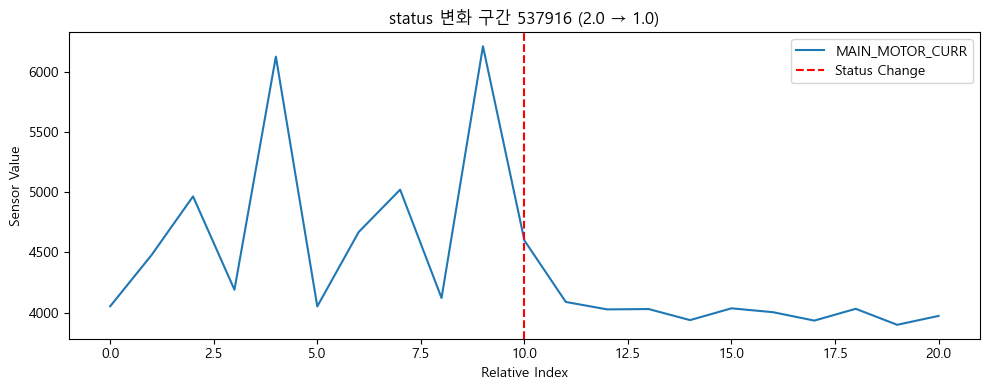

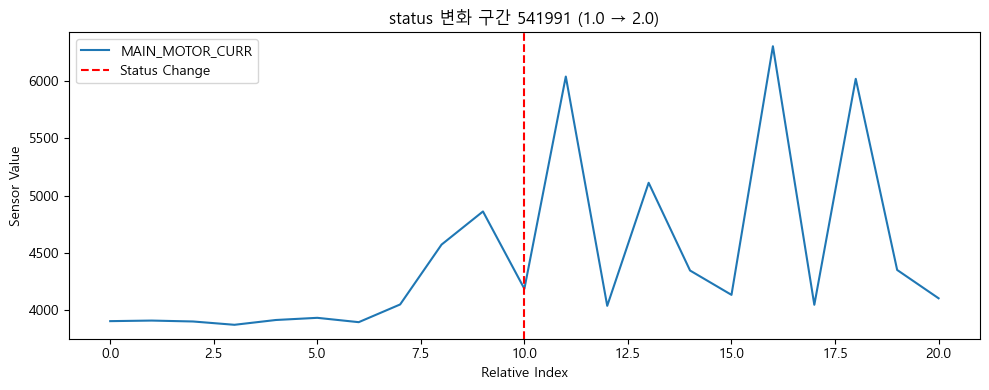

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# 전후 몇 행 볼지 설정
window = 10 
sensor_col = [
        'MAIN_MOTOR_CURR'
]
# 전처리: status 컬럼 변화 감지
df['status_prev'] = df['STATUS'].shift(1)

# 1 → 2 또는 2 → 1 변화 시점 인덱스 추출
transition_indices = df[
    ((df['status_prev'] == 1) & (df['STATUS'] == 2)) |
    ((df['status_prev'] == 2) & (df['STATUS'] == 1))
].index

# 첫 3개의 변화 시점만 그래프 확인
for i, idx in enumerate(transition_indices[:3]):
    start = max(0, idx - window)
    end = min(len(df), idx + window + 1)
    segment = df.iloc[start:end].reset_index(drop=True)

    plt.figure(figsize=(10, 4))
    for col in sensor_col:
        plt.plot(segment.index, segment[col], label=col)
    
    plt.axvline(x=window, color='red', linestyle='--', label='Status Change')
    plt.title(f'status 변화 구간 {idx} ({df.loc[idx, "status_prev"]} → {df.loc[idx, "STATUS"]})')
    plt.xlabel('인덱스')
    plt.ylabel('센서값')
    plt.legend()
    plt.tight_layout()
    plt.show()